<H1> Johdanto datatieteeseen - Harjoitustyö </H1>

<H2> Datan kerääminen </H2>

Ladataan Berliinin Airbnb-data Inside Airbnb -sivuilta ja tuodaan se csv-muodossa jupyteriin

Valitaan halututut sarakkeet ja luodaan uusi dataframe. Tämän jälkeen esitetään 10 riviä datasta

In [97]:
LISTINGSFILE = 'listings.csv'
cols = ['price',
        'accommodates',
        'bedrooms',
        'beds',
        'bathrooms',
        'room_type',
        'neighbourhood_group_cleansed',
        'number_of_reviews',
        'latitude',
        'longitude'
        ]
df = pd.read_csv(LISTINGSFILE, usecols=cols)
pd.set_option('display.max_rows', 10)
df

,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews
0,Pankow,52.583306,13.396092,Private room,2,1.0,1.0,2.0,$30.00,2
1,Pankow,52.576417,13.398582,Private room,2,1.5,1.0,1.0,$17.00,3
2,Pankow,52.589218,13.399261,Private room,4,1.0,1.0,1.0,$50.00,56
3,Pankow,52.582312,13.395584,Private room,2,1.0,1.0,1.0,$28.00,111
4,Pankow,52.583749,13.393662,Private room,1,1.0,1.0,1.0,$21.00,17
...,...,...,...,...,...,...,...,...,...,...
20571,Reinickendorf,52.569486,13.352461,Private room,2,1.0,1.0,1.0,$37.00,14
20572,Reinickendorf,52.572065,13.355454,Private room,2,1.0,1.0,1.0,$27.00,11
20573,Reinickendorf,52.602404,13.327644,Entire home/apt,4,2.0,1.0,2.0,$40.00,21
20574,Reinickendorf,52.609934,13.336775,Private room,1,1.0,1.0,1.0,$25.00,9


<H2> Datan jalostaminen </H2>

'nan'-arvojen etsiminen

In [98]:
pd.isnull(df).any()

neighbourhood_group_cleansed    False
latitude                        False
longitude                       False
room_type                       False
accommodates                    False
bathrooms                        True
bedrooms                         True
beds                             True
price                           False
number_of_reviews               False
dtype: bool

'nan'-arvojen poistaminen 

In [99]:
df = df.dropna(subset=['bathrooms', 'bedrooms', 'beds'])

Ylimääräisten merkkien poistaminen 'price'-sarakkeesta ja arvojen muuttaminen numeerisiksi

In [107]:
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)

In [101]:
pd.set_option('display.max_rows', 10)
df

,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews
0,Pankow,52.583306,13.396092,Private room,2,1.0,1.0,2.0,30.0,2
1,Pankow,52.576417,13.398582,Private room,2,1.5,1.0,1.0,17.0,3
2,Pankow,52.589218,13.399261,Private room,4,1.0,1.0,1.0,50.0,56
3,Pankow,52.582312,13.395584,Private room,2,1.0,1.0,1.0,28.0,111
4,Pankow,52.583749,13.393662,Private room,1,1.0,1.0,1.0,21.0,17
...,...,...,...,...,...,...,...,...,...,...
20571,Reinickendorf,52.569486,13.352461,Private room,2,1.0,1.0,1.0,37.0,14
20572,Reinickendorf,52.572065,13.355454,Private room,2,1.0,1.0,1.0,27.0,11
20573,Reinickendorf,52.602404,13.327644,Entire home/apt,4,2.0,1.0,2.0,40.0,21
20574,Reinickendorf,52.609934,13.336775,Private room,1,1.0,1.0,1.0,25.0,9


Otetaan huomioon vain nollaa suuremmat arvot

In [102]:
df = df[df.bedrooms > 0]
df = df[df.price > 0]
df = df[df.bathrooms > 0]
df = df[df.number_of_reviews > 0]

Luodaan kategorisista attribuuteista ja hinnasta uusi dataframe helpottamaan visualisointeja

In [125]:
df_filter = df.filter(['price','room_type','neighbourhood_group_cleansed'], axis=1)

Kategoristen arvojen muuttaminen numeerisiksi ja niiden lisääminen dataframeen sekä alkuperäisten kategoristen attribuuttien poistaminen

In [104]:
roomtype_dummies = pd.get_dummies(df.room_type)
neighbourhood_dummies = pd.get_dummies(df.neighbourhood_group_cleansed)

data = pd.concat((df.drop(['room_type', 'neighbourhood_group_cleansed'], \
    axis=1), roomtype_dummies.astype(int), neighbourhood_dummies.astype(int)),axis=1)
allcols = data.columns

In [105]:
pd.set_option('display.max_rows', 10)
data

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,Entire home/apt,Private room,...,Lichtenberg,Marzahn - Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz - Zehlendorf,Tempelhof - Schöneberg,Treptow - Köpenick
0,52.583306,13.396092,2,1.0,1.0,2.0,30.0,2,0,1,...,0,0,0,0,1,0,0,0,0,0
1,52.576417,13.398582,2,1.5,1.0,1.0,17.0,3,0,1,...,0,0,0,0,1,0,0,0,0,0
2,52.589218,13.399261,4,1.0,1.0,1.0,50.0,56,0,1,...,0,0,0,0,1,0,0,0,0,0
3,52.582312,13.395584,2,1.0,1.0,1.0,28.0,111,0,1,...,0,0,0,0,1,0,0,0,0,0
4,52.583749,13.393662,1,1.0,1.0,1.0,21.0,17,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20567,52.567753,13.360512,1,1.0,2.0,1.0,45.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
20571,52.569486,13.352461,2,1.0,1.0,1.0,37.0,14,0,1,...,0,0,0,0,0,1,0,0,0,0
20572,52.572065,13.355454,2,1.0,1.0,1.0,27.0,11,0,1,...,0,0,0,0,0,1,0,0,0,0
20573,52.602404,13.327644,4,2.0,1.0,2.0,40.0,21,1,0,...,0,0,0,0,0,1,0,0,0,0


In [108]:
data.shape

(15275, 23)

Jalostetussa datassa on 15275 riviä ja 23 attribuuttia (alkuperäisessä datassa 20576 riviä)

<H2> Datan kuvaileminen </H2>

Datan ominaisuuksia:

In [67]:
data.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,Entire home/apt,Private room,...,Lichtenberg,Marzahn - Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz - Zehlendorf,Tempelhof - Schöneberg,Treptow - Köpenick
count,15275.000000,15275.000000,15275.00000,15275.000000,15275.000000,15275.000000,15275.000000,15275.000000,15275.000000,15275.000000,...,15275.000000,15275.000000,15275.000000,15275.000000,15275.000000,15275.000000,15275.000000,15275.000000,15275.000000,15275.000000
mean,52.509831,13.407642,2.71928,1.092897,1.238298,1.649689,58.309198,16.312930,0.491718,0.496301,...,0.024550,0.004255,0.200524,0.167070,0.166612,0.010540,0.004386,0.016628,0.063961,0.024550
std,0.030029,0.054514,1.53097,0.310828,0.577195,1.216094,94.179633,29.218632,0.499948,0.500003,...,0.154754,0.065096,0.400405,0.373051,0.372641,0.102126,0.066086,0.127879,0.244691,0.154754
min,52.346203,13.116319,1.00000,0.500000,1.000000,1.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.489106,13.380694,2.00000,1.000000,1.000000,1.000000,31.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.508884,13.418042,2.00000,1.000000,1.000000,1.000000,45.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.532667,13.438790,3.00000,1.000000,1.000000,2.000000,69.000000,16.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.641499,13.743463,16.00000,8.000000,10.000000,16.000000,9000.000000,360.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Scattermatrsiisi:

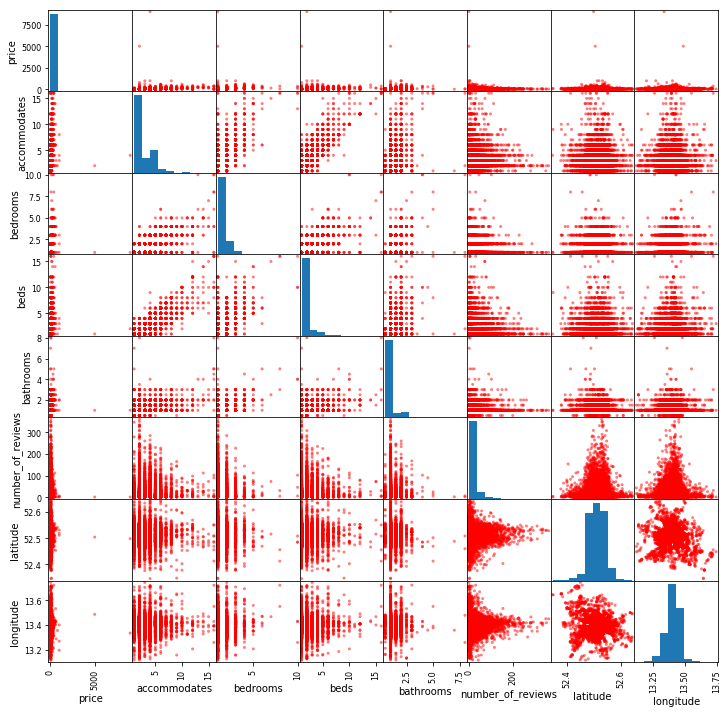

In [68]:
import matplotlib.pyplot as plt
scattercols = ['price',
        'accommodates',
        'bedrooms',
        'beds',
        'bathrooms',
        'number_of_reviews',
        'latitude',
        'longitude'
        ]
axs = pd.plotting.scatter_matrix(data[scattercols],
                        figsize=(12, 12), c='red')

=> Kuvaajasta on nähtävissä, että datan jatkojalostamista tarvitaan.
Poistetaan suuria/poikkeavia arvoja:

In [120]:
data = data[data['price'] <= 300]
data = data[data['bedrooms'] < 10]
data = data[data['beds'] <= 12]
data = data[data['bathrooms'] < 5]
data.shape

(15212, 23)

Tehdään scattermatriisi uudestaan:

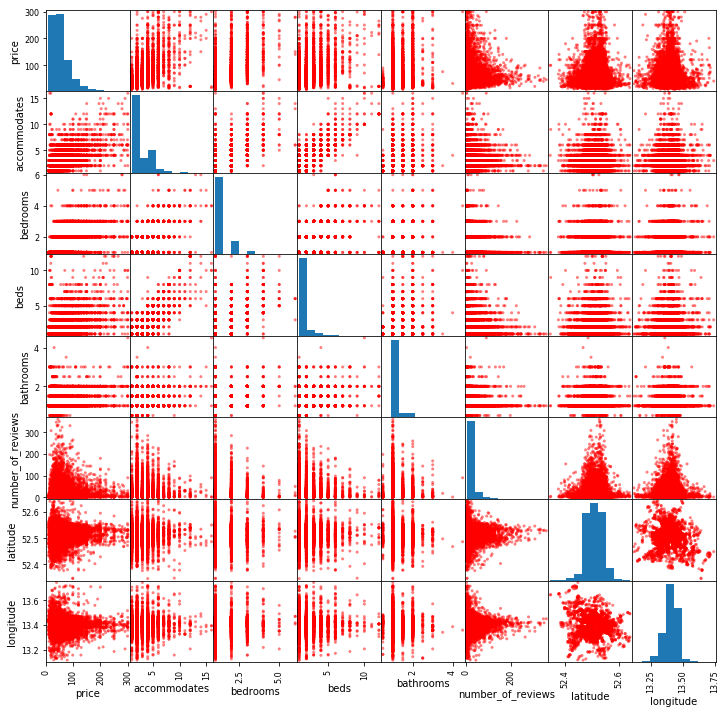

In [115]:
import matplotlib.pyplot as plt
scattercols = ['price',
        'accommodates',
        'bedrooms',
        'beds',
        'bathrooms',
        'number_of_reviews',
        'latitude',
        'longitude'
        ]
axs = pd.plotting.scatter_matrix(data[scattercols],
                        figsize=(12, 12), c='red')

=> Riippuvuutta on havaittavissa etenkin 'beds' ja 'accommodates' välillä

Korrelaatiot:

In [116]:
data.corr()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,Entire home/apt,Private room,...,Lichtenberg,Marzahn - Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz - Zehlendorf,Tempelhof - Schöneberg,Treptow - Köpenick
latitude,1.000000,-0.125940,0.036232,-0.003079,0.012856,0.026060,0.060176,0.050884,0.036121,-0.039735,...,0.015467,0.016704,0.375159,-0.472249,0.517054,0.251216,0.036124,-0.281583,-0.240167,-0.249287
longitude,-0.125940,1.000000,-0.010952,-0.016054,-0.002077,-0.009404,-0.039877,-0.022199,-0.014092,0.016806,...,0.248498,0.205712,-0.266017,0.227301,0.112533,-0.148116,-0.268557,-0.266038,-0.236218,0.311046
accommodates,0.036232,-0.010952,1.000000,0.231135,0.663851,0.798304,0.592552,0.096633,0.420182,-0.424744,...,-0.015055,0.024408,0.054219,-0.072138,0.036037,-0.016348,0.000622,-0.002219,-0.001720,0.013606
bathrooms,-0.003079,-0.016054,0.231135,1.000000,0.265602,0.249747,0.242417,0.009302,-0.020224,0.012130,...,-0.013284,0.011638,0.043909,-0.056150,-0.005459,-0.008273,0.013000,-0.003323,0.010318,0.029035
bedrooms,0.012856,-0.002077,0.663851,0.265602,1.000000,0.636388,0.566758,0.017194,0.398339,-0.388145,...,-0.022461,0.037427,0.017938,-0.045937,0.048829,-0.010525,0.003479,0.023517,0.002061,0.029925
beds,0.026060,-0.009404,0.798304,0.249747,0.636388,1.000000,0.481248,0.075909,0.315147,-0.335276,...,-0.009870,0.049483,0.044830,-0.075398,0.036207,0.000008,0.018314,0.015118,0.002706,0.029087
price,0.060176,-0.039877,0.592552,0.242417,0.566758,0.481248,1.000000,0.073830,0.527321,-0.510534,...,-0.054957,-0.007802,0.095301,-0.126643,0.069832,-0.045552,-0.014515,-0.015901,-0.012404,-0.028313
number_of_reviews,0.050884,-0.022199,0.096633,0.009302,0.017194,0.075909,0.073830,1.000000,0.049997,-0.047943,...,-0.021334,-0.010371,0.073055,-0.069141,0.031845,-0.009307,-0.014922,-0.021648,-0.008453,-0.024409
Entire home/apt,0.036121,-0.014092,0.420182,-0.020224,0.398339,0.315147,0.527321,0.049997,1.000000,-0.976353,...,-0.025719,0.010373,0.007802,-0.056668,0.081061,-0.024290,-0.020698,-0.001518,0.003310,0.003566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


=> Hinnan kanssa suurimmat kertoimet saivat 'accommodates', 'bedrooms', 'beds' ja 'Entire home/apt'. Korrelaatiomatriisi toi myös vahvistusta scattermatriisin havainnolle, sillä 'beds' ja 'accommodates saivat suurimman korrelaatiokertoimen.

Hinta eri sijainnissa:

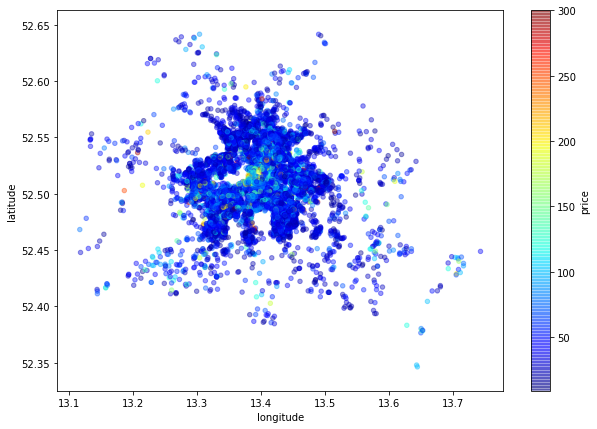

In [118]:
data.plot(kind="scatter", x="longitude", y="latitude",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, sharex=False, alpha=0.4, figsize=(10,7))

=> Syvemmän ymmärryksen muodostamiseksi kuvassa olisi pitänyt näyttää alueiden nimet

Arvosteluiden määrän vertaaminen hintaan:

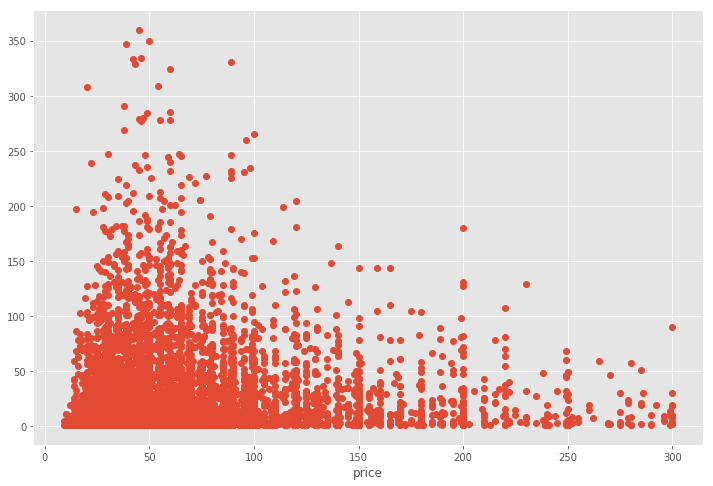

In [136]:
price_review = data[['number_of_reviews', 'price']].sort_values(by = 'price')
price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False)

=> Eniten arvosteluita saavat edullisemmat asunnot

Kylpyhuoneiden määrän vertaaminen hintaan:

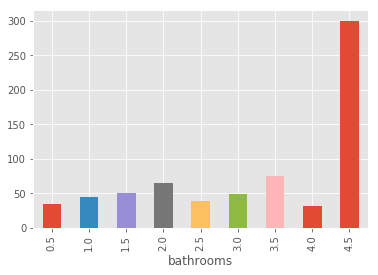

In [156]:
data.groupby('bathrooms')['price'].agg(np.median).plot(kind = 'bar')

=> Selvästi kallein hinta on asunnoissa, jossa on 4.5 kylpyhuonetta (eli ilmeisesti 4 kylpyhuone+vessa-yhdistelmää ja 1 vessa)

Tehdään sama hinnan jalostaminen df_filterille (sisältää siis attribuutit 'price', 'room_type' ja 'neighbourhood_group_cleansed')

In [152]:
df_filter = df_filter[df_filter['price'] <= 300]

Heatmap asuinalueen ja huonetyypin vaikutuksesta hintaan:

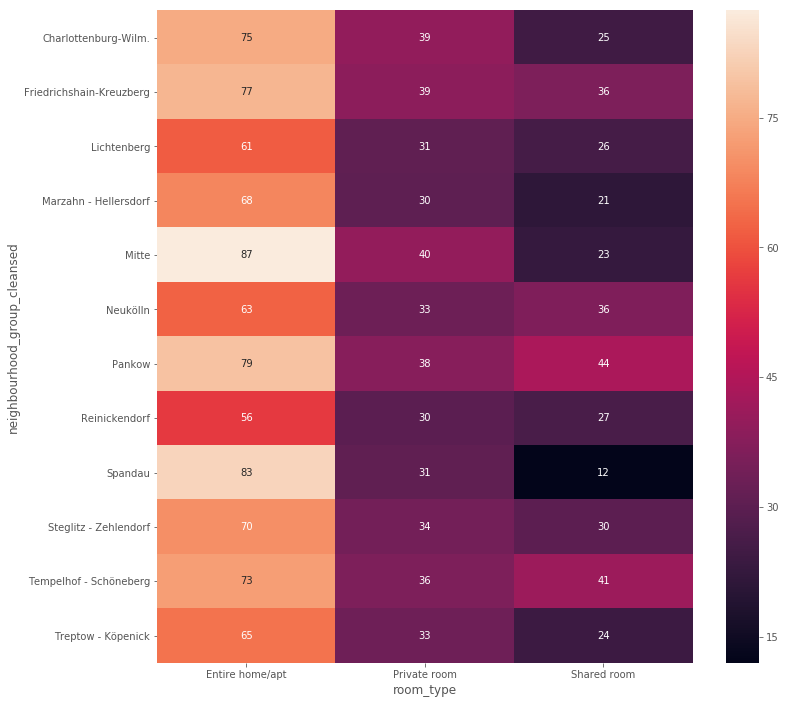

In [147]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df_filter.groupby([
        'neighbourhood_group_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

=> Keskiarvoltaan kallein hinta on Mitten koko asunnolla (87 dollaria) ja edullisin puolestaan Spandaun jaetulla huoneella (12 dollaria)

<H2> Koneoppiminen </H2>

Lineaarinen regressio hinnan ja majoittujien määrän suhteesta (majoittujien määrällä oli isoin korrelaatiokerroin hinnan kanssa):

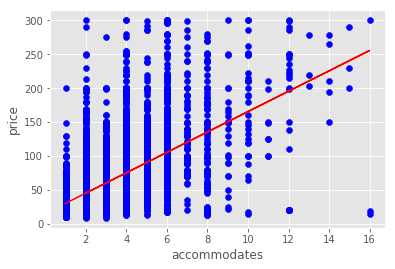

In [162]:
import numpy as np
from sklearn import datasets
from sklearn import linear_model
clf = linear_model.LinearRegression()   
X = data['accommodates'].values[:, np.newaxis]     
y = data['price']                         
classifier = clf.fit(X, y)
plt.scatter(X, y, color='b')
plt.plot(X, classifier.predict(X), color='r')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.show()

=> Melko loogista, että asuntojen hinta kasvaa majoittujien määrän kasvaessa. 

Monimuuttujaregressio:

Text(0.5,1,'Variable Importance')

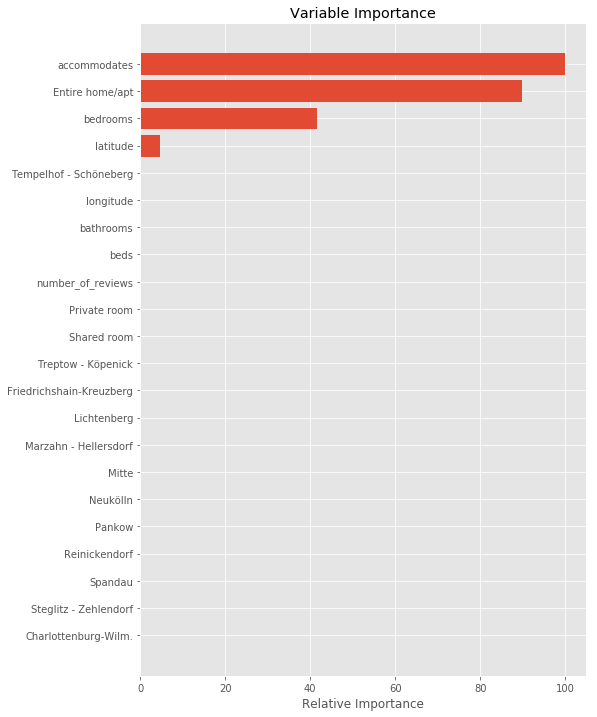

In [174]:
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
X_train, X_test, y_train, y_test = train_test_split(data.drop(['price'], axis=1),
data.price, test_size=0.2, random_state=20)
n_est = 300
tuned_parameters = {
"n_estimators": [ n_est ],
"max_depth" : [ 4 ],
"learning_rate": [ 0.01 ],
"min_samples_split" : [ 1.0 ],
"loss" : [ 'ls', 'lad' ]
}
gbr = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gbr, cv=3, param_grid=tuned_parameters,
scoring='neg_median_absolute_error')
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_
feature_importance = clf.best_estimator_.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
plt.figure(figsize=(8,12))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

=> Hintaan vaikuttavat eniten majoittujien määrä, koko asunto -huonetyyppi, makuuhuoneiden määrä ja latitude-koordinaatti.